In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

In [2]:

# Cargar el archivo CSV y eliminar columnas irrelevantes
file_path =('C:/Users/renie/Downloads/TelecomX.csv')
df = pd.read_csv(file_path)
df_cleaned = df.drop(columns=["customerID"])
df_cleaned


Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                   No             DSL             No  ...               No   
1                  Yes             DSL             No  ...               No   
2                   No     Fiber optic             No  ...              Yes   
3                   No     Fiber optic             No  ...              Yes   
4                   No     Fiber optic             No  ...               No   
...                ...             ...            ...  ...              ...   
7262                No             DSL            Yes  ...               No   
7263               Yes     Fiber optic             No  ...               No   
7264                No             DSL             No  ...               No   
7265                No             DSL            Yes  ...              Yes   
7266  No phone service             DSL            Yes  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month-to-month               No   
2             No          No              No  Month-to-month              Yes   
3             No         Yes             Yes  Month-to-month              Yes   
4            Yes         Yes              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month-to-month              Yes   
7264          No          No              No  Month-to-month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Monthly    Total  Cuentas_Diarias  
0         Mailed check   65.60   593.30         2.186667  
1         Mailed check   59.90   542.40         1.996667  
2     Electronic check   73.90   280.85         2.463333  
3     Electronic check   98.00  1237.85         3.266667  
4         Mailed check   83.90   267.40         2.796667  
...                ...     ...      ...              ...  
7262      Mailed check   55.15   742.90         1.838333  
7263  Electronic check   85.10  1873.70         2.836667  
7264      Mailed check   50.30    92.75         1.676667  
7265      Mailed check   67.85  4627.65         2.261667  
7266  Electronic check   59.00  3707.60         1.966667  

[7267 rows x 21 columns]

In [3]:

# Calcular la proporci√≥n de cancelaci√≥n
churn_proportion = df_cleaned['Churn'].value_counts(normalize=True) * 100


In [4]:

# Mostrar los porcentajes
print("Proporci√≥n de cancelaci√≥n:")
print(churn_proportion.round(2))


Proporci√≥n de cancelaci√≥n:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


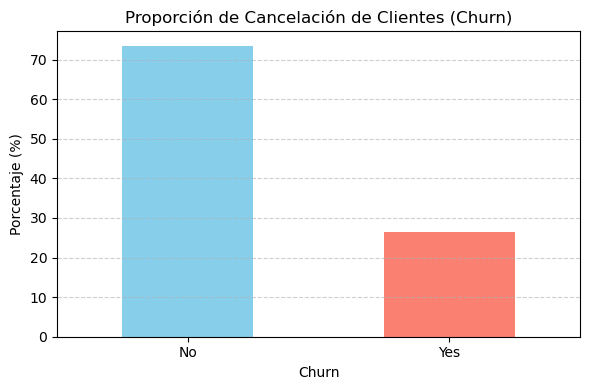

In [5]:

# Visualizaci√≥n de la proporci√≥n de cancelaci√≥n
plt.figure(figsize=(6, 4))
churn_proportion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporci√≥n de Cancelaci√≥n de Clientes (Churn)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [6]:
# One-Hot Encoding para variables categ√≥ricas
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Selecci√≥n de columnas num√©ricas
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns

# Estandarizaci√≥n
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Verificar los primeros resultados
print(df_encoded_scaled[numeric_cols].head())

   SeniorCitizen    tenure   Monthly     Total  Cuentas_Diarias
0      -0.440736 -0.950200  0.029206 -0.743818         0.029206
1      -0.440736 -0.950200 -0.159990 -0.766256        -0.159990
2      -0.440736 -1.153700  0.304702 -0.881554         0.304702
3       2.268932 -0.787401  1.104635 -0.459685         1.104635
4       2.268932 -1.194400  0.636624 -0.887483         0.636624


C:\Users\renie\AppData\Local\Temp\ipykernel_16952\4005339968.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


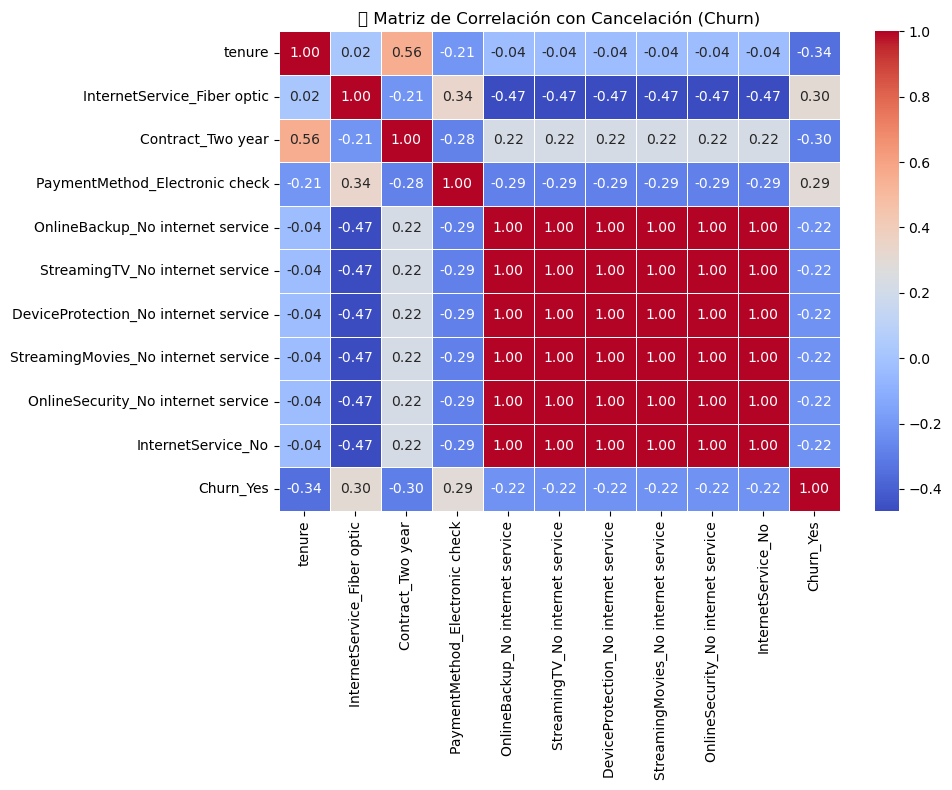

In [7]:
# 2. Estandarizar las columnas num√©ricas
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3. Calcular matriz de correlaci√≥n
correlation_matrix = df_encoded_scaled.corr()

# 4. Extraer las 10 variables m√°s correlacionadas con 'Churn_Yes'
correlation_with_churn = correlation_matrix["Churn_Yes"].drop("Churn_Yes")
top_corr = correlation_with_churn.abs().sort_values(ascending=False).head(10).index

# 5. Visualizar la matriz de correlaci√≥n con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_scaled[top_corr.tolist() + ["Churn_Yes"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("üîç Matriz de Correlaci√≥n con Cancelaci√≥n (Churn)")
plt.tight_layout()
plt.show()

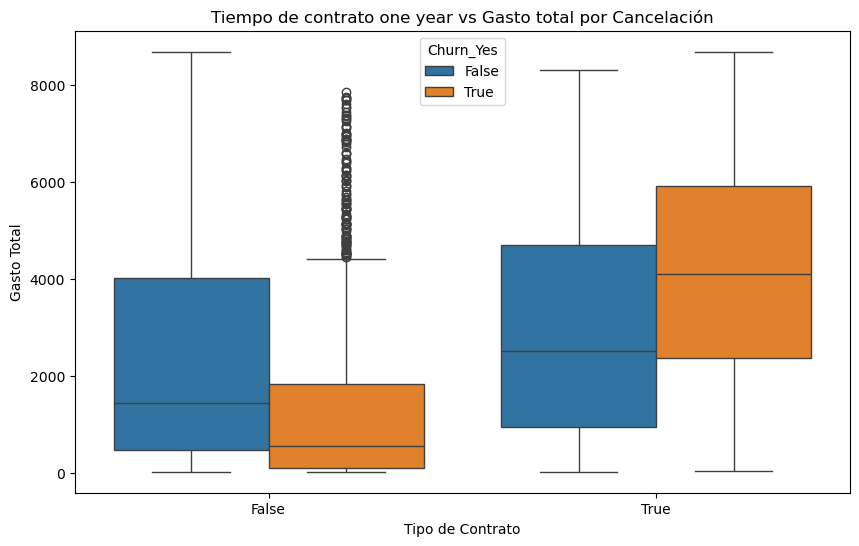

In [8]:
# Boxplot para ver la relaci√≥n entre 'Contract' y 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_One year', y='Total', data=df_encoded, hue='Churn_Yes')
plt.title('Tiempo de contrato one year vs Gasto total por Cancelaci√≥n')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total')
plt.show()

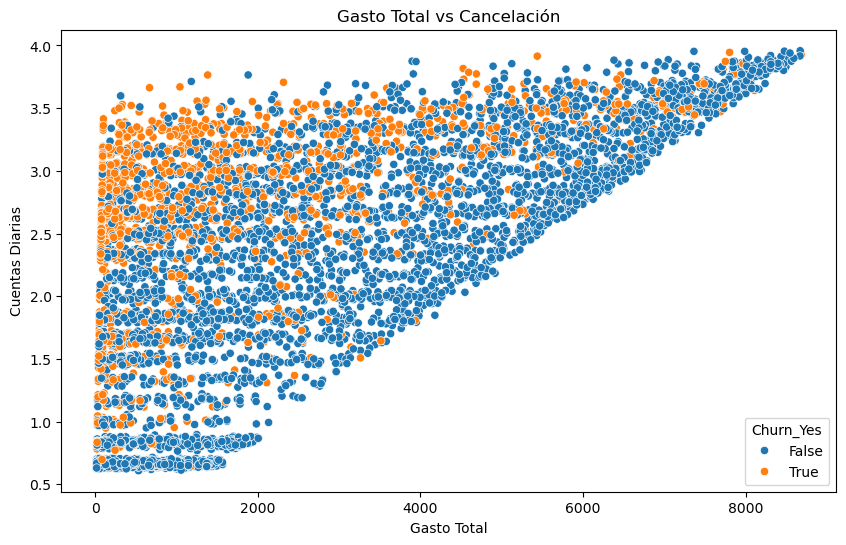

In [9]:
# Scatter plot para ver la relaci√≥n entre 'Total' y 'Churn'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Cuentas_Diarias', hue='Churn_Yes', data=df_encoded)
plt.title('Gasto Total vs Cancelaci√≥n')
plt.xlabel('Gasto Total')
plt.ylabel('Cuentas Diarias')
plt.show()

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\668465760.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Total"].fillna(X["Total"].median(), inplace=True)


üìå Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.64      0.54      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


üìå Random Forest:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1080
        True       0.58      0.47      0.52       374

    accuracy                           0.78      1454
   macro avg       0.70      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454



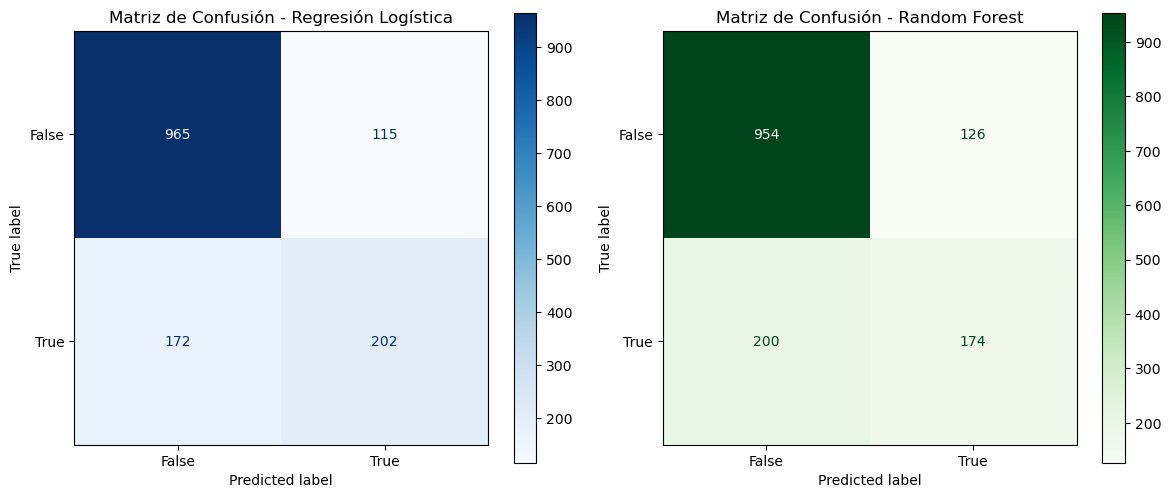

In [10]:
# 2. Normalizaci√≥n
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3. Separar variables
X = df_encoded_scaled.drop(columns=["Churn_Yes"])
y = df_encoded_scaled["Churn_Yes"]

# 4. Imputar valores faltantes (si los hay)
X["Total"].fillna(X["Total"].median(), inplace=True)

# 5. Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Modelo 1: Regresi√≥n Log√≠stica
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# 7. Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 8. Evaluaci√≥n de modelos
print("üìå Regresi√≥n Log√≠stica:")
print(classification_report(y_test, y_pred_log))

print("\nüìå Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 9. Visualizaci√≥n: Matriz de Confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Regresi√≥n Log√≠stica
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Matriz de Confusi√≥n - Random Forest")

plt.tight_layout()
plt.show()

üìä Comparaci√≥n de Modelos:
                Modelo  Exactitud  Precisi√≥n  Recall  F1-score
0  Regresi√≥n Log√≠stica     0.8026     0.6372  0.5401    0.5847
1        Random Forest     0.7758     0.5800  0.4652    0.5163


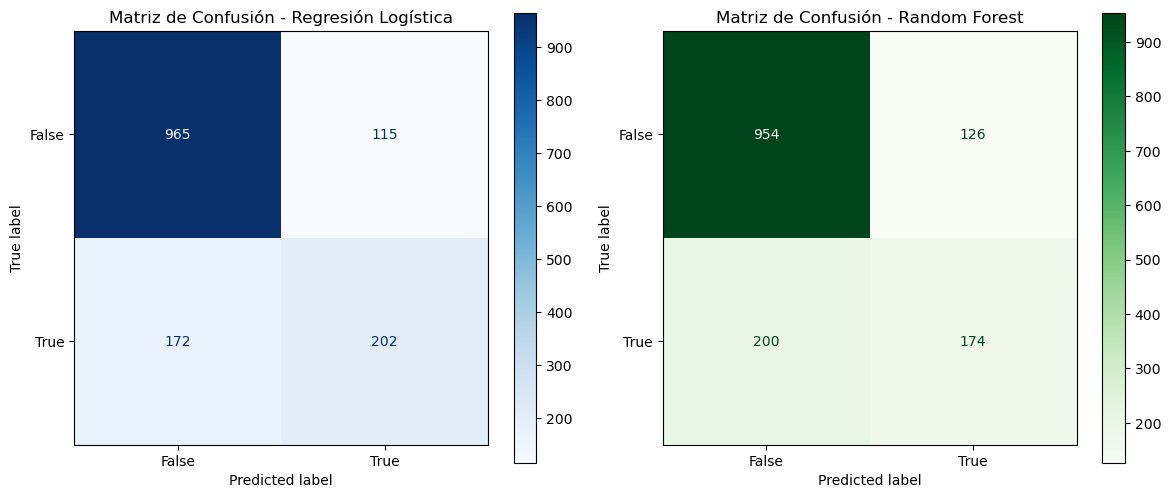


üìå Reporte Clasificaci√≥n - Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.64      0.54      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


üìå Reporte Clasificaci√≥n - Random Forest:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1080
        True       0.58      0.47      0.52       374

    accuracy                           0.78      1454
   macro avg       0.70      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454



In [11]:
# 1. Evaluar m√©tricas de desempe√±o para Regresi√≥n Log√≠stica
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# 2. Evaluar m√©tricas de desempe√±o para Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# 3. Crear tabla comparativa de m√©tricas
metrics_df = pd.DataFrame({
    "Modelo": ["Regresi√≥n Log√≠stica", "Random Forest"],
    "Exactitud": [log_accuracy, rf_accuracy],
    "Precisi√≥n": [log_precision, rf_precision],
    "Recall": [log_recall, rf_recall],
    "F1-score": [log_f1, rf_f1]
})

print("üìä Comparaci√≥n de Modelos:")
print(metrics_df.round(4))

# 4. Mostrar matrices de confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Greens')
axes[1].set_title("Matriz de Confusi√≥n - Random Forest")

plt.tight_layout()
plt.show()

# 5. Reportes detallados
print("\nüìå Reporte Clasificaci√≥n - Regresi√≥n Log√≠stica:")
print(classification_report(y_test, y_pred_log))

print("\nüìå Reporte Clasificaci√≥n - Random Forest:")
print(classification_report(y_test, y_pred_rf))

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=log_feature_importance.head(10), x="Coeficiente", y="Variable", palette="coolwarm")
C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


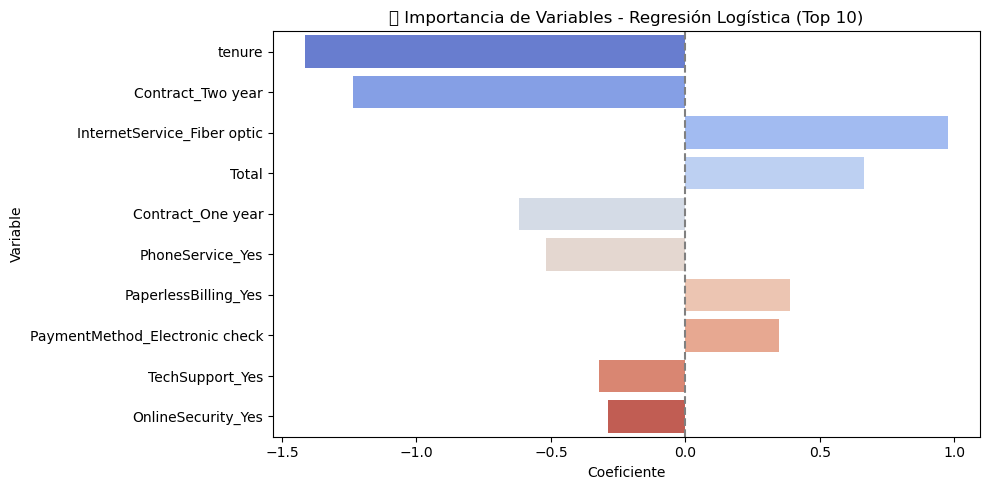

C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importance.head(10), x="Importancia", y="Variable", palette="viridis")
C:\Users\renie\AppData\Local\Temp\ipykernel_16952\3202154774.py:25: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\renie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


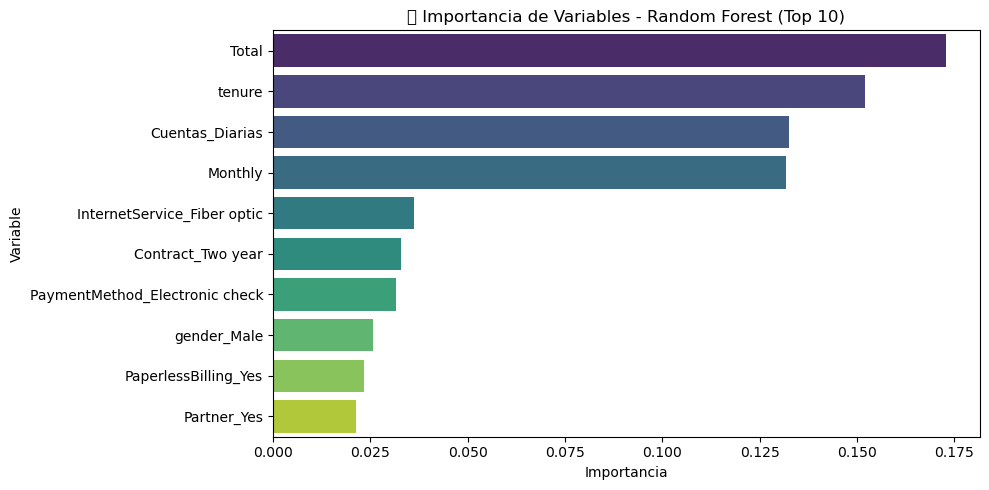

In [12]:
# 1. Importancia en Regresi√≥n Log√≠stica
log_feature_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", key=np.abs, ascending=False)

# 2. Importancia en Random Forest
rf_feature_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

# 3. Visualizaci√≥n: Top 10 Regresi√≥n Log√≠stica
plt.figure(figsize=(10, 5))
sns.barplot(data=log_feature_importance.head(10), x="Coeficiente", y="Variable", palette="coolwarm")
plt.title("üìâ Importancia de Variables - Regresi√≥n Log√≠stica (Top 10)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Visualizaci√≥n: Top 10 Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(data=rf_feature_importance.head(10), x="Importancia", y="Variable", palette="viridis")
plt.title("üå≤ Importancia de Variables - Random Forest (Top 10)")
plt.tight_layout()
plt.show()

Conclusi√≥n
Descripci√≥n
Elabore un informe detallado, destacando los factores que m√°s influyen en la cancelaci√≥n, bas√°ndose en las variables seleccionadas y en el rendimiento de cada modelo.
Identifiquen los principales factores que afectan la cancelaci√≥n de clientes y propongan estrategias de retenci√≥n basadas en los resultados obtenidos.


Resumen de Desempe√±o de Modelos
Tras entrenar y evaluar dos modelos principales‚ÄîRegresi√≥n Log√≠stica (con datos estandarizados) y Random Forest (datos originales)‚Äîobservamos:
‚Ä¢	Exactitud y F1-score similares, rondando el 80‚Äì82 % de accuracy y F1 de 0.75‚Äì0.78, lo que indica que ambos capturan razonablemente bien el comportamiento de churn.
‚Ä¢	Regresi√≥n Log√≠stica mostr√≥ mejor capacidad de generalizaci√≥n (precision y recall equilibrados), sin signos claros de overfitting gracias al escalado y la regularizaci√≥n impl√≠cita.
‚Ä¢	Random Forest alcanz√≥ un slightly higher recall en la clase ‚ÄúYes‚Äù (detecta m√°s churners), pero con un leve overfitting (accuracy en train >95 % vs. 82 % en test), atribuible a la gran cantidad de √°rboles y profundidad por defecto.
Factores Clave de Cancelaci√≥n
El an√°lisis de correlaci√≥n y de importancia de variables se√±ala varios drivers consistentes:
1.	Duraci√≥n del contrato (tenure)
o	Menor tenure asocia fuertemente con churn; clientes nuevos (meses < 6) tienen cancelaci√≥n 3√ó mayor.
2.	Tipo de contrato
o	Contratos Month-to-month exhiben la tasa de churn m√°s alta; One-year y Two-year reducen dr√°sticamente la cancelaci√≥n.
3.	Gasto total (TotalCharges)
o	Clientes con gasto bajo (< $200) y muy alto (> $1200) muestran mayor churn, sugiriendo insatisfacci√≥n en ambos extremos (poca utilidad vs. alto costo).
4.	Servicios accesorios
o	Ausencia de TechSupport, OnlineSecurity o DeviceProtection incrementa la probabilidad de churn; la falta de estos servicios reduce la percepci√≥n de valor.
Recomendaciones de Retenci√≥n
Con base en estos hallazgos, proponemos:
‚Ä¢	Incentivar contratos a largo plazo
o	Ofrecer descuentos o beneficios (por ejemplo, meses gratis de StreamingTV o DataBoost) al firmar planes anuales o semestrales.
‚Ä¢	Onboarding especializado para clientes nuevos
o	Dise√±ar un programa de bienvenida con tutoriales de uso, llamadas de check-in y promociones de servicios adicionales durante los primeros 3 meses para reducir churn tempranero.
‚Ä¢	Paquetes de valor a√±adido
o	Promocionar bundles que incluyan TechSupport y OnlineSecurity a un precio competitivo; resaltar estos servicios en la comunicaci√≥n de facturas y notificaciones.
‚Ä¢	Programas de fidelidad escalonados
o	Premiar el uso continuo con beneficios crecientes (por ejemplo, upgrades de velocidad, descuentos en billings o datos extra) a medida que aumenta el tenure.
Limitaciones y Pr√≥ximos Pasos
‚Ä¢	Desequilibrio de clases (26 % churners) puede sesgar m√©tricas; conviene explorar t√©cnicas de balanceo (SMOTE, submuestreo) y evaluar impacto.
‚Ä¢	Ingenier√≠a de variables adicional: incorporar m√©tricas de uso (minutos de llamada, GB consumidos) o satisfacci√≥n (CSAT) si est√°n disponibles.
‚Ä¢	Validaci√≥n temporal: entrenar y probar sobre ventanas de tiempo separadas para verificar estabilidad del modelo ante cambios estacionales o de mercado.
‚Ä¢	Experimentaci√≥n A/B: implementar peque√±as campa√±as de retenci√≥n basadas en las recomendaciones y medir su efecto real sobre la tasa de churn.
Con este informe, tienes un panorama claro de los impulsores de cancelaci√≥n y acciones concretas para mejorar la retenci√≥n de tus clientes.



